# Importing libraries

In [20]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
import ast
import spacy
import string
import re
import nltk
import gensim
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Importing selected models

In [21]:
# EXPERIMENT 1
fullname = "selected_models/17.12.2020_20.41/models.pickle"
file = open(fullname, "rb")
models = pickle.load(file)

# EXPERIMENT 2
#fullname = "selected_models/16.12.2020_20.34/models.pickle"
#file = open(fullname, "rb")
#models = pickle.load(file)

In [22]:
models.all_memberships

{0: array([1.        , 1.        , 0.        , 0.81755599, 1.        ,
        0.61824904, 0.64740765, 0.00951578, 0.        , 0.28312537,
        1.        , 0.        , 0.38255025, 0.        , 1.        ,
        0.64273905, 0.        , 0.64642879, 0.50520759, 1.        ,
        1.        , 0.        , 0.        , 1.        , 0.59267998,
        0.72695009, 0.309747  , 0.00305529, 0.83155949, 1.        ,
        1.        , 0.29570204, 0.68103679, 0.        , 0.87498648,
        0.08820604, 0.        , 1.        , 0.81082256, 1.        ,
        0.73454953, 0.48883409, 0.        , 1.        , 1.        ,
        0.27966711, 0.        , 1.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.18725089, 0.39552768,
        0.44040108, 0.47659945, 0.45674234, 0.46638472, 0.46653673,
        0.26524327, 1.        , 0.14301432, 0.68802012, 0.39944428,
        1.        , 0.        , 0.25238215, 0.87555883, 0.60749997,
        0.        , 0.22012227, 1.        , 0

In [23]:
models.all_labels

{0: array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 1: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1]),
 2: array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        0, 

In [24]:
models.folds

{'x train 0': array([[-0.05645985, -0.16014582,  0.89703727, ..., -0.85633063,
         -0.7407623 , -1.9533305 ],
        [-0.1134555 , -0.01013992,  1.1718442 , ..., -0.743775  ,
         -1.0753416 , -2.1538146 ],
        [ 0.05300964, -0.44816378,  1.1802207 , ..., -0.62145966,
         -0.6782287 , -2.1344707 ],
        ...,
        [ 0.17096063, -0.25488207,  1.1121464 , ..., -0.5562363 ,
         -0.7398057 , -2.1324964 ],
        [ 0.01938803, -0.33210617,  1.0609916 , ..., -0.5801819 ,
         -0.9390679 , -2.0991986 ],
        [ 0.18026827, -0.1680916 ,  1.092065  , ..., -0.6955753 ,
         -0.5620969 , -2.0753872 ]]),
 'y train 0': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1

In [63]:
all_memberships = models.all_memberships
memberships = []

for i in range(0,5):
    for j in all_memberships[i]:
        memberships.append(j)
        
memberships = pd.DataFrame(memberships)

In [326]:
memberships[0:10]

,0
0,1.000000
1,1.000000
2,0.000000
3,0.817556
4,1.000000
5,0.618249
6,0.647408
7,0.009516
8,0.000000
9,0.283125


In [87]:
predictions = [(index, 1) if x.values >= 0.5 else (index, 0) for index, x in memberships.iterrows()]

In [94]:
predictions[0:10]

[(0, 1),
 (1, 1),
 (2, 0),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 0),
 (8, 0),
 (9, 0)]

In [98]:
all_labels = models.all_labels
labels = []

for i in range(0,5):
    for j in all_labels[i]:
        labels.append(j)
        
labels = pd.DataFrame(labels)

In [99]:
labels[0:10]

,0
0,1
1,1
2,1
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [100]:
len(predictions), len(labels), len(memberships)

(500, 500, 500)

# Frequencies

In [404]:
def plot_hist(data):
    plt.figure(figsize=(15, 7))
    weights = np.ones_like(data)/float(len(data))
    plt.hist(data, weights=weights)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.grid()

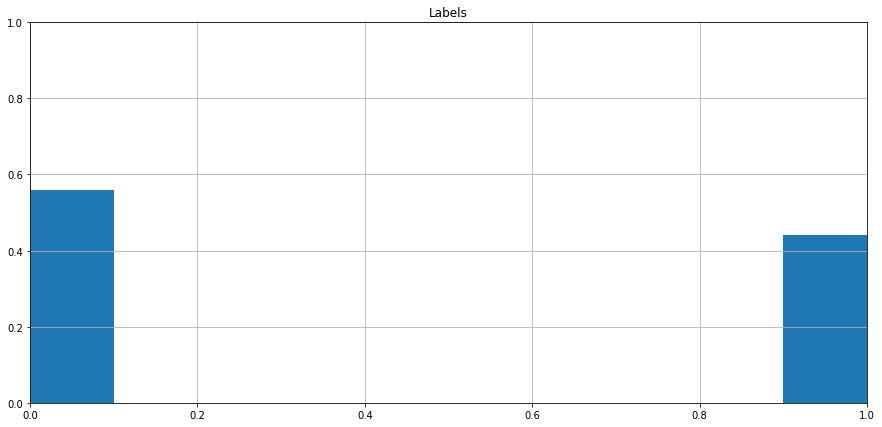

In [405]:
plot_hist(labels)

plt.title("Labels")
plt.show()

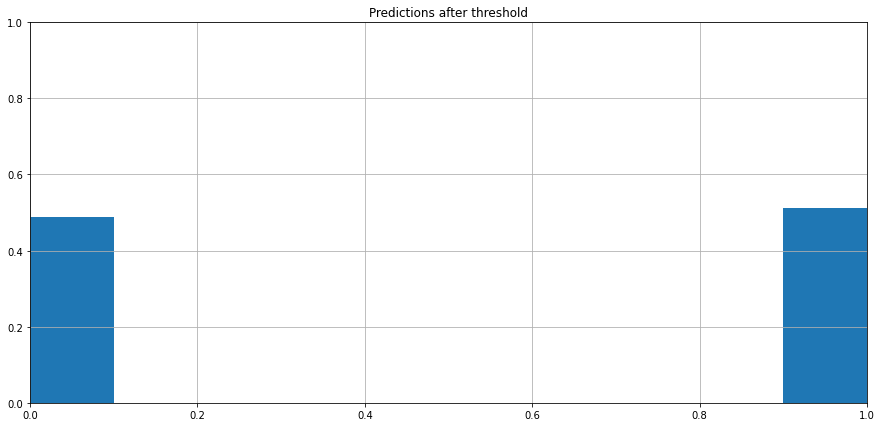

In [406]:
plot_hist([i[1] for i in predictions])

plt.title("Predictions after threshold")
plt.show()

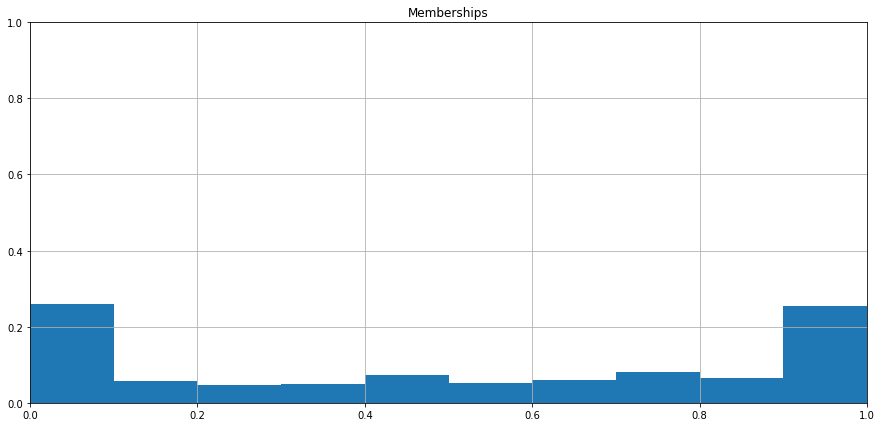

In [407]:
plot_hist(memberships)

plt.title("Memberships")
plt.show()

In [97]:
memberships

,0
0,1.000000
1,1.000000
2,0.000000
3,0.817556
4,1.000000
...,...
495,0.781503
496,0.155352
497,0.479610
498,1.000000


In [113]:
def select_radius(radius):
    special_range = [(index, x[0]) for index, x in memberships.iterrows() if x.values <= 0.5 + radius and x.values >= 0.5 - radius]
    return special_range

In [114]:
memberships

,0
0,1.000000
1,1.000000
2,0.000000
3,0.817556
4,1.000000
...,...
495,0.781503
496,0.155352
497,0.479610
498,1.000000


In [193]:
interval = select_radius(0.15)
interval_ids = [index[0] for index in interval]
interval[:10]

[(5, 0.6182490398185156),
 (6, 0.6474076525028554),
 (12, 0.38255025395343656),
 (15, 0.6427390499822269),
 (17, 0.6464287891228518),
 (18, 0.505207593487758),
 (24, 0.5926799767288476),
 (41, 0.48883408815024054),
 (54, 0.39552767916433007),
 (55, 0.44040107971164366)]

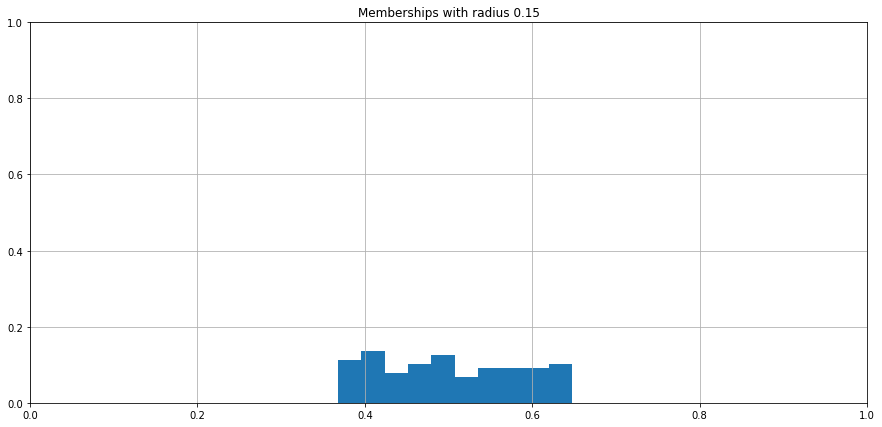

In [412]:
radius = 0.15
plot_hist([x[1] for x in interval])

plt.title("Memberships with radius " + str(radius))
plt.show()

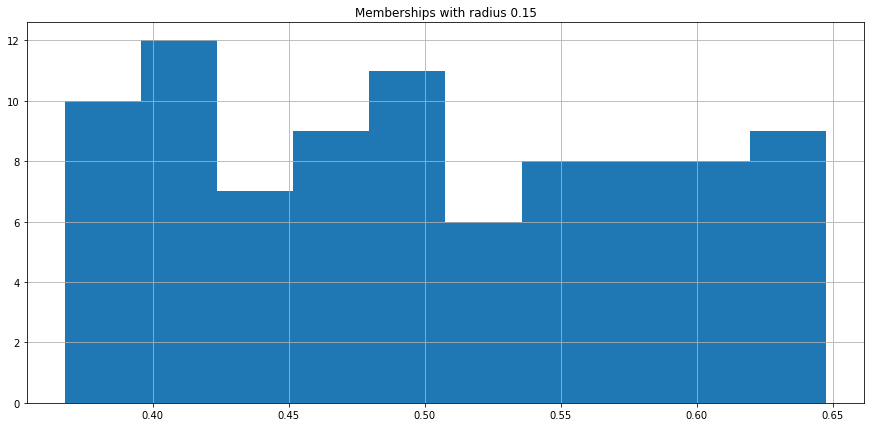

In [413]:
plt.figure(figsize=(15, 7))
plt.hist([x[1] for x in interval])
plt.grid()
plt.title("Memberships with radius " + str(radius))
plt.show()

In [119]:
radius = 0.15
select_radius(radius)[:10]

[(5, 0.6182490398185156),
 (6, 0.6474076525028554),
 (12, 0.38255025395343656),
 (15, 0.6427390499822269),
 (17, 0.6464287891228518),
 (18, 0.505207593487758),
 (24, 0.5926799767288476),
 (41, 0.48883408815024054),
 (54, 0.39552767916433007),
 (55, 0.44040107971164366)]

In [38]:
models.all_memberships[0]

array([1.        , 1.        , 0.        , 0.81755599, 1.        ,
       0.61824904, 0.64740765, 0.00951578, 0.        , 0.28312537,
       1.        , 0.        , 0.38255025, 0.        , 1.        ,
       0.64273905, 0.        , 0.64642879, 0.50520759, 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.59267998,
       0.72695009, 0.309747  , 0.00305529, 0.83155949, 1.        ,
       1.        , 0.29570204, 0.68103679, 0.        , 0.87498648,
       0.08820604, 0.        , 1.        , 0.81082256, 1.        ,
       0.73454953, 0.48883409, 0.        , 1.        , 1.        ,
       0.27966711, 0.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 0.18725089, 0.39552768,
       0.44040108, 0.47659945, 0.45674234, 0.46638472, 0.46653673,
       0.26524327, 1.        , 0.14301432, 0.68802012, 0.39944428,
       1.        , 0.        , 0.25238215, 0.87555883, 0.60749997,
       0.        , 0.22012227, 1.        , 0.0757929 , 0.07288

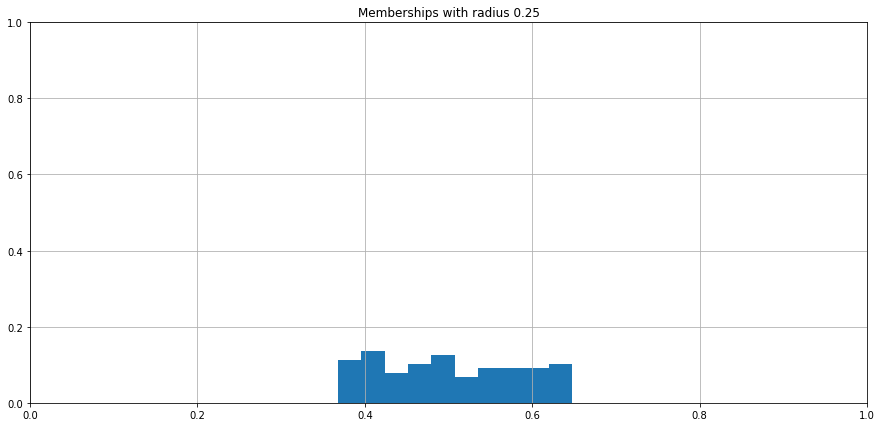

In [415]:
radius = 0.25
plot_hist([x[1] for x in interval])

plt.title("Memberships with radius " + str(radius))
plt.show()

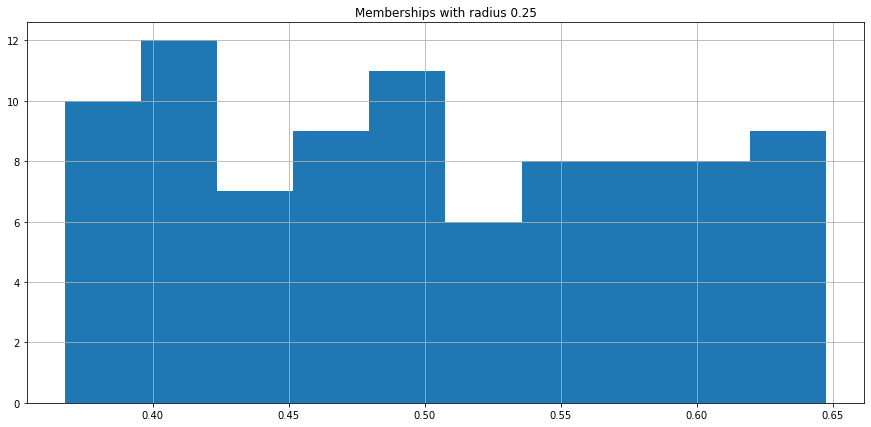

In [417]:
plt.figure(figsize=(15, 7))
plt.hist([x[1] for x in interval])
plt.grid()
plt.title("Memberships with radius " + str(radius))
plt.show()

# Classes of error (TP, FP, TN, FN)

In [40]:
data = pd.DataFrame(columns = ["Outcome", "Label", "Prediction", "Membership"])

print("Outcome", "Label", "Prediction", "Membership")

for lab, pred, memb in zip(labels, predictions, memberships):
    if pred == 1:
        if lab == pred:
            data = data.append({
                "Outcome": "TP", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("TP", "\t", lab, "\t", pred, "\t", memb)
        else:
            data = data.append({
                "Outcome": "FP", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("FP", "\t", lab, "\t", pred, "\t", memb)
    else:
        if lab == pred:
            data = data.append({
                "Outcome": "TN", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("TN", "\t", lab, "\t", pred, "\t", memb)
        else:
            data = data.append({
                "Outcome": "FN", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("FN", "\t", lab, "\t", pred, "\t", memb)

Outcome Label Prediction Membership
TP 	 1 	 1 	 1.0
TP 	 1 	 1 	 1.0
FN 	 1 	 0 	 0.0
FP 	 0 	 1 	 0.8175559884230175
TP 	 1 	 1 	 1.0
FP 	 0 	 1 	 0.6182490398185156
FP 	 0 	 1 	 0.6474076525028554
TN 	 0 	 0 	 0.009515784269889194
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.2831253730405159
TP 	 1 	 1 	 1.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.38255025395343656
FN 	 1 	 0 	 0.0
TP 	 1 	 1 	 1.0
TP 	 1 	 1 	 0.6427390499822269
TN 	 0 	 0 	 0.0
FP 	 0 	 1 	 0.6464287891228518
TP 	 1 	 1 	 0.505207593487758
TP 	 1 	 1 	 1.0
TP 	 1 	 1 	 1.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TP 	 1 	 1 	 1.0
FP 	 0 	 1 	 0.5926799767288476
TP 	 1 	 1 	 0.7269500907619402
FN 	 1 	 0 	 0.30974700216468176
TN 	 0 	 0 	 0.0030552859618661055
TP 	 1 	 1 	 0.8315594927769498
TP 	 1 	 1 	 1.0
TP 	 1 	 1 	 1.0
TN 	 0 	 0 	 0.29570204006759615
TP 	 1 	 1 	 0.6810367918238698
TN 	 0 	 0 	 0.0
TP 	 1 	 1 	 0.8749864787298113
TN 	 0 	 0 	 0.08820603558638274
TN 	 0 	 0 	 0.0
TP 	 1 	 1 	 1.0
TP 	 1 	 1 	 0.8108225599725698
TP 	 1 	

FP 	 0 	 1 	 0.7470910098326213
FP 	 0 	 1 	 0.7007253782649141
TN 	 0 	 0 	 0.0
TP 	 1 	 1 	 1.0
TN 	 0 	 0 	 0.2727064048326413
TP 	 1 	 1 	 0.6416990477441555
TN 	 0 	 0 	 0.0
TP 	 1 	 1 	 1.0
FP 	 0 	 1 	 0.5274770472068379
TN 	 0 	 0 	 0.28766062026591377
TP 	 1 	 1 	 0.999458339724884
TP 	 1 	 1 	 1.0
TN 	 0 	 0 	 0.06316683534178713
TP 	 1 	 1 	 0.5561606426764988
TP 	 1 	 1 	 0.66462933272407
TN 	 0 	 0 	 0.19594192025740542
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.05055493461171934
TN 	 0 	 0 	 0.0
FP 	 0 	 1 	 0.656070124412776
TP 	 1 	 1 	 1.0
FN 	 1 	 0 	 0.4302539076457984
TP 	 1 	 1 	 1.0
FN 	 1 	 0 	 0.0
FP 	 0 	 1 	 0.7460906462614609
TN 	 0 	 0 	 0.2685292769452595
TN 	 0 	 0 	 0.0696691985543294
TP 	 1 	 1 	 1.0
TN 	 0 	 0 	 0.0
TP 	 1 	 1 	 0.7915217918590356
TP 	 1 	 1 	 1.0
TN 	 0 	 0 	 0.24061181357643846
FN 	 1 	 0 	 0.4076139720926355
TN 	 0 	 0 	 0.16421575558472756
FP 	 0 	 1 	 0.5873378273406131
TN 	 0 	 0 	 0.1833275796161885
TP 	 1 	 1 	 0.7437922499589413
TP 	 1 	 

In [41]:
data[data["Outcome"] == "TP"].head(10)

,Outcome,Label,Prediction,Membership
0,TP,1,1,1.000000
1,TP,1,1,1.000000
4,TP,1,1,1.000000
10,TP,1,1,1.000000
14,TP,1,1,1.000000
15,TP,1,1,0.642739
18,TP,1,1,0.505208
19,TP,1,1,1.000000
20,TP,1,1,1.000000
23,TP,1,1,1.000000


In [42]:
data[data["Outcome"] == "FP"].head(10)

,Outcome,Label,Prediction,Membership
3,FP,0,1,0.817556
5,FP,0,1,0.618249
6,FP,0,1,0.647408
17,FP,0,1,0.646429
24,FP,0,1,0.592680
63,FP,0,1,0.688020
69,FP,0,1,0.607500
91,FP,0,1,0.858333
99,FP,0,1,1.000000
117,FP,0,1,1.000000


In [43]:
data[data["Outcome"] == "FP"].head(10)

,Outcome,Label,Prediction,Membership
3,FP,0,1,0.817556
5,FP,0,1,0.618249
6,FP,0,1,0.647408
17,FP,0,1,0.646429
24,FP,0,1,0.592680
63,FP,0,1,0.688020
69,FP,0,1,0.607500
91,FP,0,1,0.858333
99,FP,0,1,1.000000
117,FP,0,1,1.000000


In [44]:
data[data["Outcome"] == "FN"].head(10)

,Outcome,Label,Prediction,Membership
2,FN,1,0,0.000000
13,FN,1,0,0.000000
26,FN,1,0,0.309747
58,FN,1,0,0.466385
59,FN,1,0,0.466537
67,FN,1,0,0.252382
70,FN,1,0,0.000000
74,FN,1,0,0.072880
78,FN,1,0,0.445331
83,FN,1,0,0.492705


In [45]:
tp = data[data["Outcome"] == "TP"]["Membership"]
fp = data[data["Outcome"] == "FP"]["Membership"]
tn = data[data["Outcome"] == "TN"]["Membership"]
fn = data[data["Outcome"] == "FN"]["Membership"]

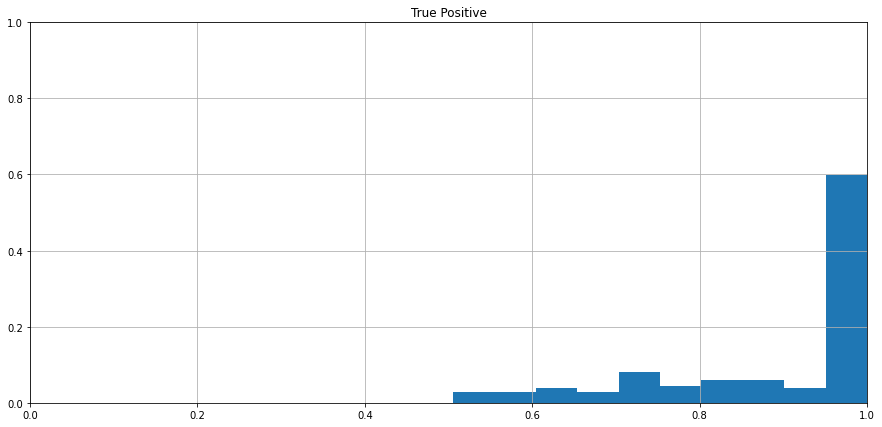

In [47]:
plot_hist(tp)

plt.title("True Positive")
plt.show()

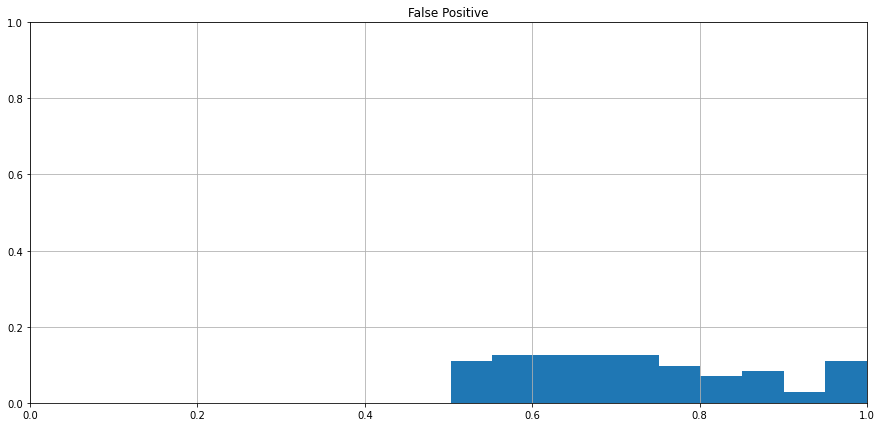

In [48]:
plot_hist(fp)

plt.title("False Positive")
plt.show()

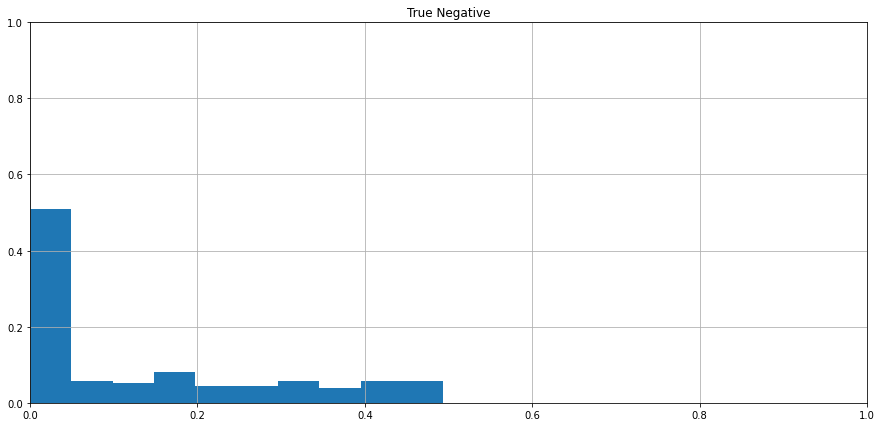

In [49]:
plot_hist(tn)

plt.title("True Negative")
plt.show()

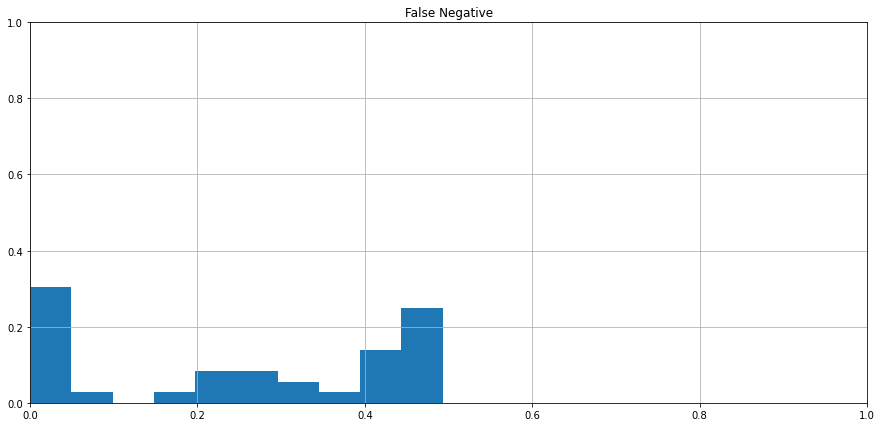

In [50]:
plot_hist(fn)

plt.title("False Negative")
plt.show()

Over 500 news

In [51]:
confusion = pd.DataFrame(confusion_matrix(labels, predictions), 
             index=["Classified fake", "Classified not fake"], 
             columns=["Actually fake", "Actually not fake"])
confusion

,Actually fake,Actually not fake
Classified fake,208,72
Classified not fake,36,184


In [52]:
print("TP: ", len(tp))
print("FP: ", len(fp))
print("TN: ", len(tn))
print("FN: ", len(fn))

TP:  184
FP:  72
TN:  208
FN:  36


In [53]:
len(tp)+len(fp)+len(tn)+len(fn)

500

In [54]:
len(tp) + len(tn), len(fp) + len(fn)

(392, 108)

In [55]:
tp_string = data[data["Outcome"] == "TP"]["Outcome"].values
fp_string = data[data["Outcome"] == "FP"]["Outcome"].values
tn_string = data[data["Outcome"] == "TN"]["Outcome"].values
fn_string = data[data["Outcome"] == "FN"]["Outcome"].values

In [56]:
all_cases = []

for i in tp_string:
    all_cases.append(i)
    
for i in fp_string:
    all_cases.append(i)
    
for i in tn_string:
    all_cases.append(i)
    
for i in fn_string:
    all_cases.append(i)

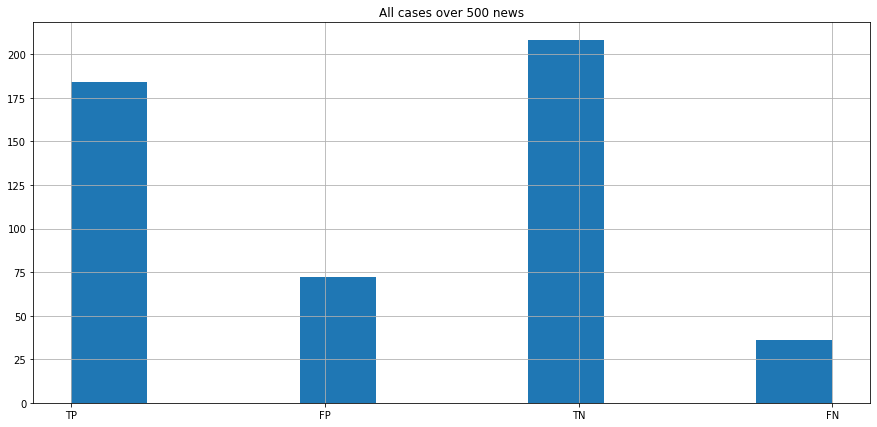

In [421]:
plt.figure(figsize=(15, 7))
plt.hist(all_cases)
plt.grid()
plt.title("All cases over 500 news")
plt.show()

In [58]:
tp.describe(), fp.describe(), tn.describe(), fn.describe()

(count    184.000000
 mean       0.899170
 std        0.141670
 min        0.505208
 25%        0.805482
 50%        1.000000
 75%        1.000000
 max        1.000000
 Name: Membership, dtype: float64,
 count    72.000000
 mean      0.727687
 std       0.144141
 min       0.502448
 25%       0.606444
 50%       0.727207
 75%       0.831179
 max       1.000000
 Name: Membership, dtype: float64,
 count    208.000000
 mean       0.131569
 std        0.162322
 min        0.000000
 25%        0.000000
 50%        0.027920
 75%        0.266065
 max        0.493706
 Name: Membership, dtype: float64,
 count    36.000000
 mean      0.252755
 std       0.195038
 min       0.000000
 25%       0.000000
 50%       0.266910
 75%       0.434023
 max       0.492893
 Name: Membership, dtype: float64)

In [59]:
accuracy_score(labels, predictions)

0.784

In [60]:
(len(tp) + len(tn)) / 500

0.784

# Baseline

In [522]:
def my_confusion_matrix(labels, predicted_labels):
    '''
    true positive: predicted_labels = labels = 1
    false positive: predicted_labels = 1 != labels = 0
    true negative: predicted_labels = labels = 0
    false negative: predicted_labels = 0 != labels = 1
    '''

    TP = 0
    FP = 0
    FN = 0
    TN = 0
    
    for label, predicted_label in zip(labels, predicted_labels):
        if predicted_label == 1: # positive
            if predicted_label == label: # true positive
                TP = TP + 1
            else: # false positive
                FP = FP + 1
        else: # negative
            if predicted_label == label: # true negative
                TN = TN + 1
            else: # false negative
                FN = FN + 1
            
    return TP, FP, FN, TN

def precision(TP, FP):
    ''' true positive / (true positive + false positive)'''
    if TP + FP == 0.0:
        return 0.0
    else:
        return TP / (TP + FP)

def recall(TP, FN):
    ''' true positive / (true positive + false negative) '''
    if TP + FN == 0.0:
        return 0.0
    else:
        return TP / (TP + FN)

def f_one(precision, recall):
    ''' 2 * [(precision * recall) / (precision + recall)] '''
    if precision + recall == 0.0:
        return 0.0
    else:
        return 2 * ((precision * recall) / (precision + recall))

In [502]:
tree = DecisionTreeClassifier()
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
SVM = svm.LinearSVC()

tree_pred = []
NN_pred = []
SVM_pred = []

tree_scores = []
NN_scores = []
SVM_scores = []

for i in range(0,5):
    X_train = models.folds['x train '+str(i)]
    y_train = models.folds['y train '+str(i)]
    X_test = models.folds['x test '+str(i)]
    y_test = models.folds['y test '+str(i)]
    
    tree.fit(X_train, y_train)
    NN.fit(X_train, y_train)
    SVM.fit(X_train, y_train)
    
    tree_pred.append(tree.predict(X_test))
    NN_pred.append(NN.predict(X_test))
    SVM_pred.append(SVM.predict(X_test))
    
    tree_scores.append(tree.score(X_test, y_test))
    NN_scores.append(NN.score(X_test, y_test))
    SVM_scores.append(SVM.score(X_test, y_test))
    
print("Tree classifier: ", np.mean(tree_scores))
print("Neural network: ", np.mean(NN_scores))
print("Support vector machine: ", np.mean(SVM_scores))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sci

Tree classifier:  0.694
Neural network:  0.8619999999999999
Support vector machine:  0.898


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [503]:
all_tree_predictions = []

for i in tree_pred:
    for j in i:
        all_tree_predictions.append(j)
        
all_NN_predictions = []

for i in NN_pred:
    for j in i:
        all_NN_predictions.append(j)
        
all_SVM_predictions = []

for i in SVM_pred:
    for j in i:
        all_SVM_predictions.append(j)

In [523]:
TP, FP, FN, TN = my_confusion_matrix(labels[0], all_tree_predictions)
confusion_tree = pd.DataFrame([[TP, FP], [FN, TN]],
             index=["Classified fake", "Classified not fake"], 
             columns=["Actually fake", "Actually not fake"])
precision_tree = precision(TP, FP)
recall_tree = recall(TP, FN)
f1_tree = f_one(precision_tree, recall_tree)

TP, FP, FN, TN = my_confusion_matrix(labels[0], all_NN_predictions)
confusion_NN = pd.DataFrame([[TP, FP], [FN, TN]],
             index=["Classified fake", "Classified not fake"], 
             columns=["Actually fake", "Actually not fake"])
precision_NN = precision(TP, FP)
recall_NN = recall(TP, FN)
f1_NN = f_one(precision_NN, recall_NN)

TP, FP, FN, TN = my_confusion_matrix(labels[0], all_SVM_predictions)
confusion_SVM = pd.DataFrame([[TP, FP], [FN, TN]],
             index=["Classified fake", "Classified not fake"], 
             columns=["Actually fake", "Actually not fake"])
precision_SVM = precision(TP, FP)
recall_SVM = recall(TP, FN)
f1_SVM = f_one(precision_SVM, recall_SVM)

In [513]:
confusion_tree

,Actually fake,Actually not fake
Classified fake,144,77
Classified not fake,76,203


In [514]:
confusion_NN

,Actually fake,Actually not fake
Classified fake,186,35
Classified not fake,34,245


In [515]:
confusion_SVM

,Actually fake,Actually not fake
Classified fake,192,23
Classified not fake,28,257


In [527]:
pd.DataFrame([[precision_tree, recall_tree, f1_tree],
              [precision_NN, recall_NN, f1_NN], 
              [precision_SVM, recall_SVM, f1_SVM]],
              index=["tree classifier", "neural network", "svm"], 
              columns=["precision", "recall", "f1"])

,precision,recall,f1
tree classifier,0.651584,0.654545,0.653061
neural network,0.841629,0.845455,0.843537
svm,0.893023,0.872727,0.882759


# Learning Curve

In [205]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.001, 0.01, 10)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

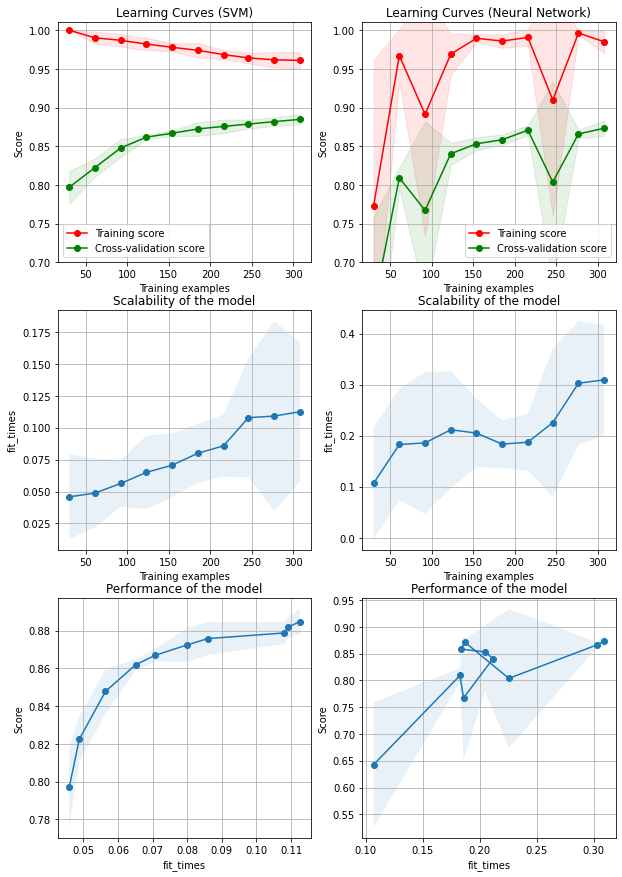

In [227]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

PATH_TEXTS = "preprocessed_datasets/text/16.12.2020_19.31/final_text_dataset_38592.csv"

# data loading
dataset = pd.read_csv(PATH_TEXTS)

def simple_split(dataset):
    X = dataset.iloc[:, 2].values  # x-component
    y = dataset.iloc[:, 3].values  # labels
    return X, y

X, y = simple_split(dataset)
X = [ast.literal_eval(i) for i in X]  # this is needed to parse strings
X = np.array(X)

#title = "Learning Curves (Tree Classifier)"
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = DecisionTreeClassifier()
#plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
#                    cv=cv, n_jobs=4)

title = "Learning Curves (Neural Network)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (SVM)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = svm.LinearSVC()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

# Lookup Table - Retrieve news

In [209]:
fullname = "preprocessed_datasets/text/23.11.2020_02.22/dataset_fake.pickle"
file = open(fullname, "rb")
dataset_fake = pickle.load(file)

fullname = "preprocessed_datasets/text/23.11.2020_02.22/dataset_true.pickle"
file = open(fullname, "rb")
dataset_true = pickle.load(file)

# Lookup Table - Retrieve aggregated values for baseline

In [228]:
folds = models.folds 
vectors = []
vectors_labels = []

for i in range(0, 5):
    for x, label in zip(folds['x test ' + str(i)], folds['y test ' + str(i)]):
        vectors.append(x)
        vectors_labels.append(label)

In [330]:
sample = pd.DataFrame(vectors)
sample.insert(0, 'label', pd.Series(vectors_labels))
sample

,label,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,1,0.065178,-0.384174,0.668095,-0.802118,0.613217,0.014682,1.579549,0.442300,-1.661688,...,0.746851,0.157784,-0.668462,-1.060757,-2.376317,0.785672,0.366898,-0.479208,-0.822933,-2.128762
1,1,-0.020198,-0.434503,0.894030,-0.723830,0.578441,0.031854,1.318092,0.296898,-1.778263,...,0.438450,0.204925,-0.377304,-1.045076,-2.560891,1.020485,0.535519,-0.605528,-0.806493,-2.116511
2,1,0.129218,-0.475859,1.012271,-0.754640,0.698307,-0.419199,1.591895,-0.039240,-2.203089,...,0.513823,-0.125323,-0.523260,-1.113101,-2.785213,1.319175,0.190926,-0.809883,-0.541150,-2.139483
3,0,0.180016,-0.225798,1.087343,-0.756917,0.402126,0.080651,1.222842,0.071703,-1.810552,...,0.422759,0.351318,-0.193427,-1.104992,-2.314739,0.938551,0.264018,-0.557162,-0.521183,-2.224105
4,1,-0.074679,-0.295684,0.973464,-0.906838,0.434296,0.235871,1.371191,0.515025,-1.689215,...,0.340943,0.472942,-0.368707,-0.948900,-2.439582,0.873972,0.412377,-0.732232,-0.964979,-2.083659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,0.193813,-0.231755,1.152613,-0.785103,0.590273,-0.136447,1.527347,0.105436,-1.913181,...,0.493554,0.166816,-0.467722,-1.150741,-2.483213,1.069973,0.390784,-0.654812,-0.547403,-2.133020
496,0,-0.039260,-0.193750,0.933657,-0.772500,0.463739,0.215483,0.984936,0.160528,-1.930659,...,0.557195,0.171815,-0.418057,-0.935165,-2.308344,0.746414,0.325664,-0.683911,-0.537656,-2.148303
497,0,0.170961,-0.254882,1.112146,-0.808501,0.457782,0.038303,1.300587,0.095466,-1.938888,...,0.649953,0.296371,-0.334539,-1.093061,-2.453895,0.850856,0.135665,-0.556236,-0.739806,-2.132496
498,1,0.019388,-0.332106,1.060992,-0.822382,0.802890,-0.194417,1.555264,0.353627,-1.790453,...,0.464698,0.289159,-0.281225,-0.865717,-2.386316,0.921921,0.632985,-0.580182,-0.939068,-2.099199


In [230]:
sample.iloc[[i for i in interval_ids]]

,label,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
5,0,0.085222,-0.067383,1.212994,-0.777724,0.465519,-0.061936,1.347661,0.135002,-1.995333,...,0.490381,0.285772,-0.387819,-1.068540,-2.376066,0.992838,0.357161,-0.630644,-0.592435,-2.052310
6,0,0.583547,0.122409,1.228167,-0.973359,0.385982,-0.128161,1.223880,0.067827,-1.581270,...,0.816141,0.387287,-0.373858,-0.900724,-2.211474,1.162067,0.387388,-0.437808,-0.651564,-1.741139
12,0,0.023791,-0.148980,0.931599,-0.767917,0.564596,-0.010513,1.168619,0.037166,-2.047558,...,0.580223,0.143548,-0.283417,-0.979059,-2.313375,0.841817,0.373062,-0.728492,-0.575691,-2.227450
15,1,-0.027906,-0.140682,0.956372,-0.855377,0.560068,-0.065039,1.369119,0.124427,-2.035694,...,0.389588,0.206481,-0.323247,-1.051587,-2.322134,0.843179,0.376541,-0.666372,-0.720380,-2.068000
17,0,0.006263,-0.133575,1.058163,-0.774996,0.317513,0.367819,1.047822,-0.043136,-1.951300,...,0.437118,0.279788,-0.409892,-1.006965,-2.679099,0.904063,0.237932,-0.678699,-0.688230,-2.218823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,1,-0.117388,-0.247724,1.022839,-0.887225,0.299241,0.290210,1.400471,0.117242,-1.784281,...,0.358554,0.294667,-0.310674,-0.961633,-2.481737,0.812035,0.224045,-0.730363,-0.656241,-2.219257
485,1,0.276916,-0.323527,1.083463,-0.893289,0.580697,0.043567,1.560872,0.390550,-1.716971,...,0.645197,0.211123,-0.479706,-1.049144,-2.422347,1.012640,0.291774,-0.638346,-0.795974,-2.131700
486,0,0.212764,-0.197429,1.021486,-0.641698,0.520737,0.000800,1.283439,-0.045671,-1.978247,...,0.347922,0.175291,-0.203551,-1.121765,-2.476090,0.909947,0.396871,-0.654883,-0.596234,-2.295066
492,1,-0.227716,0.007447,1.141045,-0.893010,0.313357,0.046123,1.257055,0.138848,-1.788102,...,0.387203,0.299783,-0.309243,-1.042925,-2.339590,0.776072,0.368502,-0.720864,-0.757234,-2.219875


# Indecision cases

In [231]:
# this code is necessary in order to transform ids in (0, 499) to the original ones in (0, 38591)
# and then do the research in the preprocessed dataset with ids
# the alternative method was to do the research directly in the dataset 
# with vectors but this has much more computational cost

interval_sample = sample.iloc[[i for i in interval_ids]]
lookup = models.lookup
interval_original_ids = []
interval_original_labels = []

for index, x in interval_sample.loc[:, interval_sample.columns != 'label'].iterrows():
    lookup_id = lookup[str(x.values)]['id']
    lookup_label = lookup[str(x.values)]['label']
    interval_original_ids.append(lookup_id) # original ids of news extracted in this interval
    interval_original_labels.append(lookup_label) # original labels of news extracted in this interval

In [331]:
final_ids = []

for i in interval_original_ids:
    if i in dataset["index"]:
        final_id = dataset.index[dataset["index"] == i][0]
        final_ids.append(final_id)

In [346]:
data_interval = dataset.loc[[i for i in final_ids]]
data_interval

,Unnamed: 0,index,text,label
5,5,21121,"[0.08522157, -0.06738286, 1.2129937, -0.777724...",0
6,6,505,"[0.5835467, 0.122408725, 1.2281668, -0.9733591...",0
12,12,3245,"[0.023791278, -0.14897966, 0.93159944, -0.7679...",0
15,15,27725,"[-0.027905535, -0.14068246, 0.95637226, -0.855...",1
17,17,13097,"[0.0062629324, -0.13357529, 1.058163, -0.77499...",0
...,...,...,...,...
478,478,26634,"[-0.11738756, -0.24772398, 1.0228394, -0.88722...",1
485,485,37168,"[0.27691576, -0.32352656, 1.0834632, -0.893288...",1
486,486,14945,"[0.21276353, -0.19742894, 1.0214863, -0.641698...",0
492,492,27261,"[-0.22771642, 0.0074468884, 1.1410451, -0.8930...",1


In [349]:
data_interval["text"] = data_interval["text"].apply(lambda s : ast.literal_eval(s))

We confirmed the consistence of our data, now we can safely use the vector and go on with the baseline

In [383]:
tree_predictions = []
NN_predictions = []
SVM_predictions = []

for test_data in data_interval["text"]:
    test_data = np.array(test_data).reshape(1, -1)
    tree_predictions.append(tree.predict(test_data))
    NN_predictions.append(NN.predict(test_data))
    SVM_predictions.append(SVM.predict(test_data))

In [448]:
ground_truth_interval = data_interval["label"]

In [449]:
ground_truth_interval[:10]

5     0
6     0
12    0
15    1
17    0
18    1
24    0
41    0
54    0
55    0
Name: label, dtype: int64

In [394]:
[x[0] for x in tree_predictions][:10], [x[0] for x in NN_predictions][:10], [x[0] for x in SVM_predictions][:10]

([0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

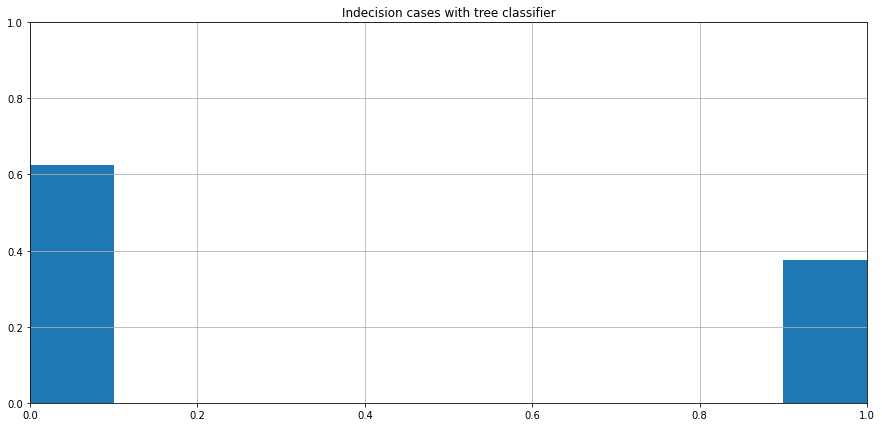

In [400]:
plot_hist([x[0] for x in tree_predictions])
plt.title("Indecision cases with tree classifier")
plt.show()

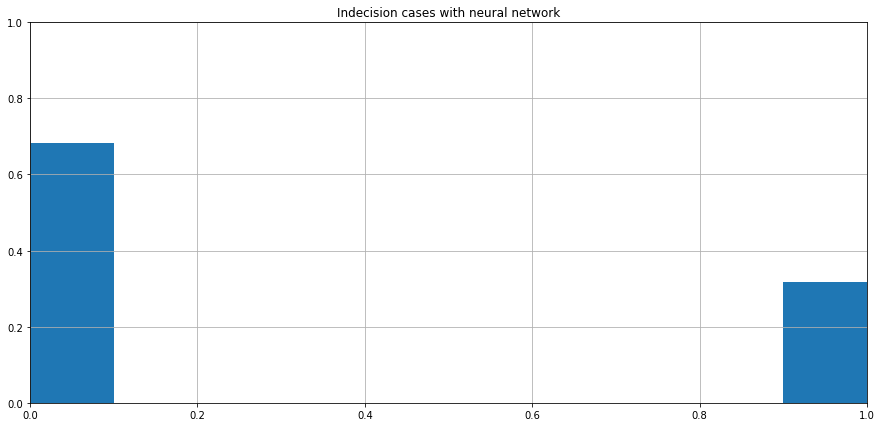

In [402]:
plot_hist([x[0] for x in NN_predictions])

plt.title("Indecision cases with neural network")
plt.show()

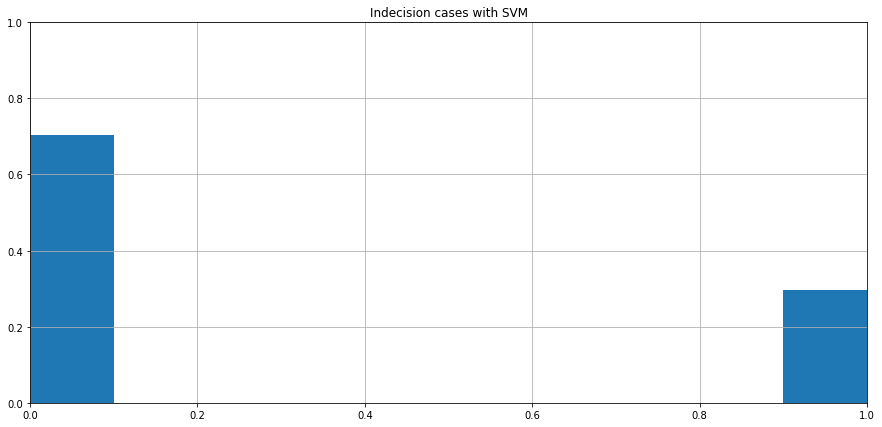

In [403]:
plot_hist([x[0] for x in SVM_predictions])

plt.title("Indecision cases with SVM")
plt.show()

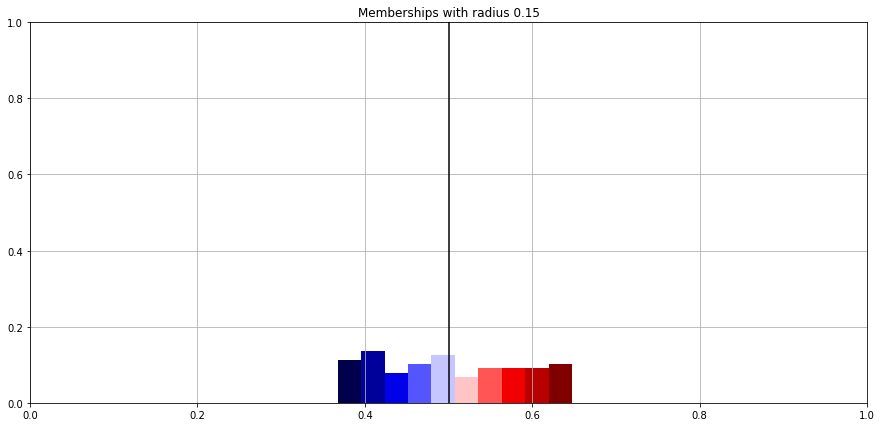

In [446]:
plt.figure(figsize=(15, 7))
weights = np.ones_like([x[1] for x in interval])/float(len([x[1] for x in interval]))
_, bins, patches = plt.hist([x[1] for x in interval], 10, color = "r", weights=weights)
plt.xlim(0,1)
plt.ylim(0,1)

cm = plt.cm.get_cmap("seismic")

bin_centers = 0.5*(bins[:-1]+bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, "facecolor", cm(c))
    
plt.grid()
radius = 0.15
plt.title("Memberships with radius " + str(radius))
plt.axvline(x=0.5, color = "k")
plt.show()

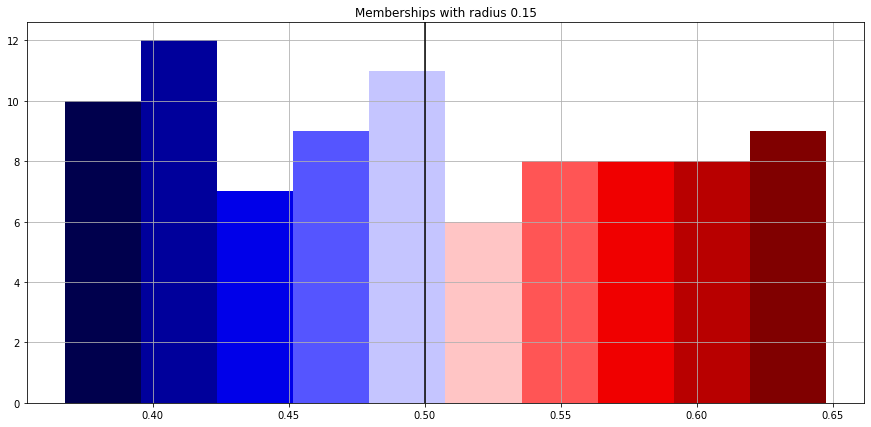

In [447]:
plt.figure(figsize=(15, 7))
_, bins, patches = plt.hist([x[1] for x in interval], 10, color = "r")

cm = plt.cm.get_cmap("seismic")

bin_centers = 0.5*(bins[:-1]+bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, "facecolor", cm(c))
    
plt.grid()
radius = 0.15
plt.title("Memberships with radius " + str(radius))
plt.axvline(x=0.5, color = "k")
plt.show()

In [455]:
experiment_tree = pd.DataFrame(columns = ["Outcome", "Label", "Prediction", "Membership"])

print("Outcome", "Label", "Prediction", "Membership")

for lab, pred, memb in zip(ground_truth_interval, [x[0] for x in tree_predictions], [x[1] for x in interval]):
    if pred == 1:
        if lab == pred:
            experiment_tree = experiment_tree.append({
                "Outcome": "TP", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("TP", "\t", lab, "\t", pred, "\t", memb)
        else:
            experiment_tree = experiment_tree.append({
                "Outcome": "FP", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("FP", "\t", lab, "\t", pred, "\t", memb)
    else:
        if lab == pred:
            experiment_tree = experiment_tree.append({
                "Outcome": "TN", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("TN", "\t", lab, "\t", pred, "\t", memb)
        else:
            experiment_tree = experiment_tree.append({
                "Outcome": "FN", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("FN", "\t", lab, "\t", pred, "\t", memb)

Outcome Label Prediction Membership
TN 	 0 	 0 	 0.6182490398185156
TN 	 0 	 0 	 0.6474076525028554
TN 	 0 	 0 	 0.38255025395343656
TP 	 1 	 1 	 0.6427390499822269
TN 	 0 	 0 	 0.6464287891228518
TP 	 1 	 1 	 0.505207593487758
TN 	 0 	 0 	 0.5926799767288476
TN 	 0 	 0 	 0.48883408815024054
TN 	 0 	 0 	 0.39552767916433007
TN 	 0 	 0 	 0.44040107971164366
TN 	 0 	 0 	 0.47659944750417327
TN 	 0 	 0 	 0.4567423401378198
TP 	 1 	 1 	 0.4663847202328425
TP 	 1 	 1 	 0.46653673195773715
TN 	 0 	 0 	 0.3994442842883206
TN 	 0 	 0 	 0.6074999683021007
TP 	 1 	 1 	 0.44533109633493184
TP 	 1 	 1 	 0.4927046291151721
TN 	 0 	 0 	 0.38965275653539033
TP 	 1 	 1 	 0.41194406491599656
TN 	 0 	 0 	 0.37363721523525506
TP 	 1 	 1 	 0.4884611100294983
TN 	 0 	 0 	 0.544066366483583
TN 	 0 	 0 	 0.6286962852930342
TP 	 1 	 1 	 0.5199352478721698
TN 	 0 	 0 	 0.42057603275495115
TN 	 0 	 0 	 0.5811984953042428
TP 	 1 	 1 	 0.6009450257572266
TP 	 1 	 1 	 0.5492167536837108
TP 	 1 	 1 	 0.629900745921

In [452]:
experiment_NN = pd.DataFrame(columns = ["Outcome", "Label", "Prediction", "Membership"])

print("Outcome", "Label", "Prediction", "Membership")

for lab, pred, memb in zip(ground_truth_interval, [x[0] for x in NN_predictions], [x[1] for x in interval]):
    if pred == 1:
        if lab == pred:
            experiment_NN = experiment_NN.append({
                "Outcome": "TP", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("TP", "\t", lab, "\t", pred, "\t", memb)
        else:
            experiment_NN = experiment_NN.append({
                "Outcome": "FP", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("FP", "\t", lab, "\t", pred, "\t", memb)
    else:
        if lab == pred:
            experiment_NN = experiment_NN.append({
                "Outcome": "TN", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("TN", "\t", lab, "\t", pred, "\t", memb)
        else:
            experiment_NN = experiment_NN.append({
                "Outcome": "FN", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("FN", "\t", lab, "\t", pred, "\t", memb)

Outcome Label Prediction Membership
TN 	 0 	 0 	 0.6182490398185156
TN 	 0 	 0 	 0.6474076525028554
TN 	 0 	 0 	 0.38255025395343656
TP 	 1 	 1 	 0.6427390499822269
TN 	 0 	 0 	 0.6464287891228518
TP 	 1 	 1 	 0.505207593487758
TN 	 0 	 0 	 0.5926799767288476
TN 	 0 	 0 	 0.48883408815024054
TN 	 0 	 0 	 0.39552767916433007
TN 	 0 	 0 	 0.44040107971164366
TN 	 0 	 0 	 0.47659944750417327
TN 	 0 	 0 	 0.4567423401378198
TP 	 1 	 1 	 0.4663847202328425
TP 	 1 	 1 	 0.46653673195773715
TN 	 0 	 0 	 0.3994442842883206
TN 	 0 	 0 	 0.6074999683021007
TP 	 1 	 1 	 0.44533109633493184
TP 	 1 	 1 	 0.4927046291151721
TN 	 0 	 0 	 0.38965275653539033
TP 	 1 	 1 	 0.41194406491599656
TN 	 0 	 0 	 0.37363721523525506
TP 	 1 	 1 	 0.4884611100294983
TN 	 0 	 0 	 0.544066366483583
TN 	 0 	 0 	 0.6286962852930342
TP 	 1 	 1 	 0.5199352478721698
TN 	 0 	 0 	 0.42057603275495115
TN 	 0 	 0 	 0.5811984953042428
TP 	 1 	 1 	 0.6009450257572266
TP 	 1 	 1 	 0.5492167536837108
TP 	 1 	 1 	 0.629900745921

In [453]:
experiment_SVM = pd.DataFrame(columns = ["Outcome", "Label", "Prediction", "Membership"])

print("Outcome", "Label", "Prediction", "Membership")

for lab, pred, memb in zip(ground_truth_interval, [x[0] for x in SVM_predictions], [x[1] for x in interval]):
    if pred == 1:
        if lab == pred:
            experiment_SVM = experiment_SVM.append({
                "Outcome": "TP", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("TP", "\t", lab, "\t", pred, "\t", memb)
        else:
            experiment_SVM = experiment_SVM.append({
                "Outcome": "FP", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("FP", "\t", lab, "\t", pred, "\t", memb)
    else:
        if lab == pred:
            experiment_SVM = experiment_SVM.append({
                "Outcome": "TN", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("TN", "\t", lab, "\t", pred, "\t", memb)
        else:
            experiment_SVM = experiment_SVM.append({
                "Outcome": "FN", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("FN", "\t", lab, "\t", pred, "\t", memb)

Outcome Label Prediction Membership
TN 	 0 	 0 	 0.6182490398185156
TN 	 0 	 0 	 0.6474076525028554
TN 	 0 	 0 	 0.38255025395343656
TP 	 1 	 1 	 0.6427390499822269
TN 	 0 	 0 	 0.6464287891228518
TP 	 1 	 1 	 0.505207593487758
TN 	 0 	 0 	 0.5926799767288476
TN 	 0 	 0 	 0.48883408815024054
TN 	 0 	 0 	 0.39552767916433007
TN 	 0 	 0 	 0.44040107971164366
TN 	 0 	 0 	 0.47659944750417327
TN 	 0 	 0 	 0.4567423401378198
TP 	 1 	 1 	 0.4663847202328425
TP 	 1 	 1 	 0.46653673195773715
TN 	 0 	 0 	 0.3994442842883206
TN 	 0 	 0 	 0.6074999683021007
FN 	 1 	 0 	 0.44533109633493184
FN 	 1 	 0 	 0.4927046291151721
TN 	 0 	 0 	 0.38965275653539033
TP 	 1 	 1 	 0.41194406491599656
TN 	 0 	 0 	 0.37363721523525506
TP 	 1 	 1 	 0.4884611100294983
FP 	 0 	 1 	 0.544066366483583
TN 	 0 	 0 	 0.6286962852930342
FN 	 1 	 0 	 0.5199352478721698
TN 	 0 	 0 	 0.42057603275495115
TN 	 0 	 0 	 0.5811984953042428
TP 	 1 	 1 	 0.6009450257572266
TP 	 1 	 1 	 0.5492167536837108
FN 	 1 	 0 	 0.629900745921

In [528]:
TP, FP, FN, TN = my_confusion_matrix(ground_truth_interval, [x[0] for x in tree_predictions])
confusion_tree = pd.DataFrame([[TP, FP], [FN, TN]],
             index=["Classified fake", "Classified not fake"], 
             columns=["Actually fake", "Actually not fake"])
precision_tree = precision(TP, FP)
recall_tree = recall(TP, FN)
f1_tree = f_one(precision_tree, recall_tree)

TP, FP, FN, TN = my_confusion_matrix(ground_truth_interval, [x[0] for x in NN_predictions])
confusion_NN = pd.DataFrame([[TP, FP], [FN, TN]],
             index=["Classified fake", "Classified not fake"], 
             columns=["Actually fake", "Actually not fake"])
precision_NN = precision(TP, FP)
recall_NN = recall(TP, FN)
f1_NN = f_one(precision_NN, recall_NN)

TP, FP, FN, TN = my_confusion_matrix(ground_truth_interval, [x[0] for x in SVM_predictions])
confusion_SVM = pd.DataFrame([[TP, FP], [FN, TN]],
             index=["Classified fake", "Classified not fake"], 
             columns=["Actually fake", "Actually not fake"])
precision_SVM = precision(TP, FP)
recall_SVM = recall(TP, FN)
f1_SVM = f_one(precision_SVM, recall_SVM)

In [529]:
pd.DataFrame([[precision_tree, recall_tree, f1_tree],
              [precision_NN, recall_NN, f1_NN], 
              [precision_SVM, recall_SVM, f1_SVM]],
              index=["tree classifier", "neural network", "svm"], 
              columns=["precision", "recall", "f1"])

,precision,recall,f1
tree classifier,0.848485,0.903226,0.875000
neural network,0.964286,0.870968,0.915254
svm,0.884615,0.741935,0.807018


# Lookup Table - Retrieve text

In [304]:
def retrieve_text(data):
    offset = len(dataset_true.preprocessed)

    for index, x in data.iterrows():
        if x["label"] == 1:
            print("News number " + str(x["index"]) + " is fake")
            print(dataset_fake.preprocessed[x["index"] - offset])
            print("")
        else:
            print("News number " + str(x["index"]) + " is real")
            print(dataset_true.preprocessed[x["index"]])
            print("")

In [305]:
retrieve_text(data_interval)

News number 21121 is real
['bangkok', 'reuters', 'oust', 'thai', 'prime', 'minister', 'yingluck', 'shinawatra', 'flee', 'country', 'ahead', 'verdict', 'negligence', 'trial', 'bring', 'junta', 'overthrow', 'source', 'close', 'family', 'friday', 'dominate', 'politic', 'year', 'fail', 'court', 'judgment', 'case', 'center', 'multi', 'billion', 'dollar', 'loss', 'incur', 'rice', 'subsidy', 'scheme', 'farmer', 'face', 'prison', 'find', 'guilty', 'commerce', 'jail', 'related', 'definitely', 'leave', 'thailand', 'member', 'puea', 'party', 's', 'brother', 'thaksin', 'head', 'political', 'clan', 'coup', 'exile', 'escape', 'corruption', 'conviction', 'aim', 'demolish', 'populist', 'movement', 'found', 'struggle', 'royalist', 'pro', 'military', 'elite', 'heart', 'turmoil', 'reignite', 'tension', 'army', 'largely', 'snuff', 'open', 'opposition', 'supreme', 'issue', 'arrest', 'warrant', 'reschedule', 'sept', 'believe', 'excuse', 'attend', 'hearing', 'ear', 'problem', 'possible', 'deputy', 'prawit', 